In [1]:
import numpy as np
import pandas as pd 

In [2]:
data = pd.read_csv('dataset1.csv')
data.head()

,x,y
0,1,2
1,2,10
2,3,28
3,4,60
4,5,110


In [3]:
import matplotlib.pyplot as plt

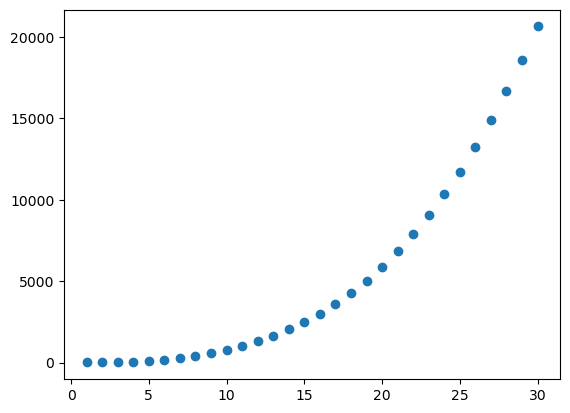

In [4]:
plt.scatter(data['x'], data['y'])

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [11]:
x = data.x.values.reshape(-1,1)
y = data.y

Degree 1: MSE = 6024861.406896551


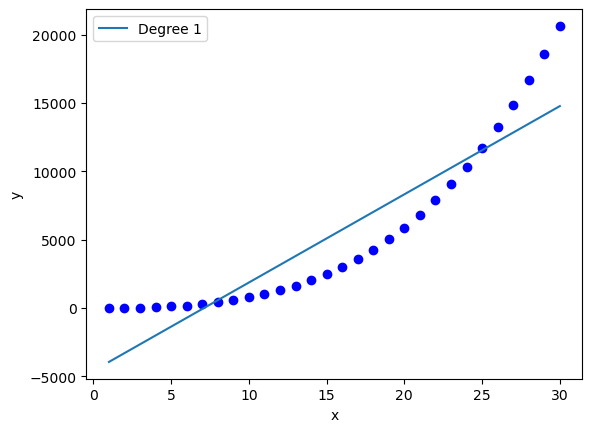

Degree 2: MSE = 203699.05583584934


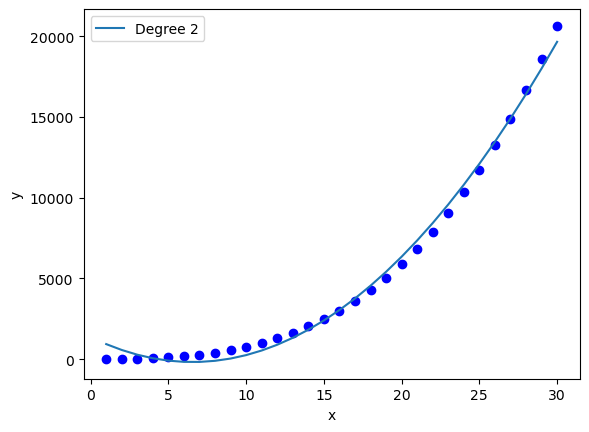

Degree 3: MSE = 328.7213750318105


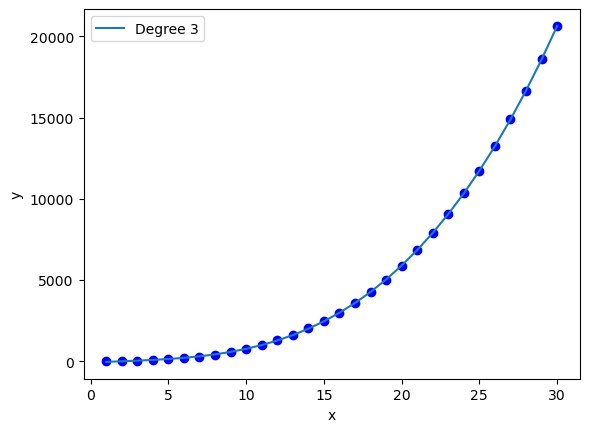

Degree 4: MSE = 160.09052421363327


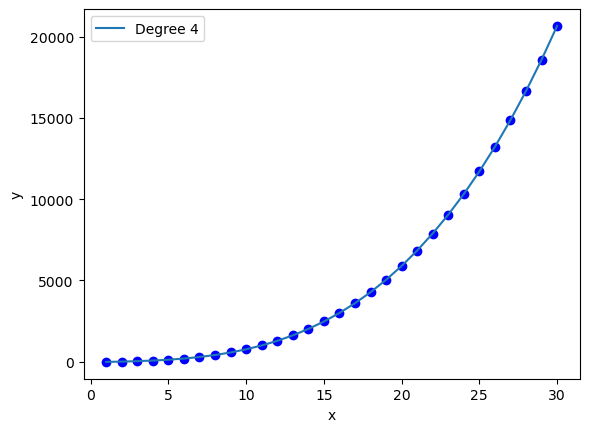

Degree 5: MSE = 29.97884405203182


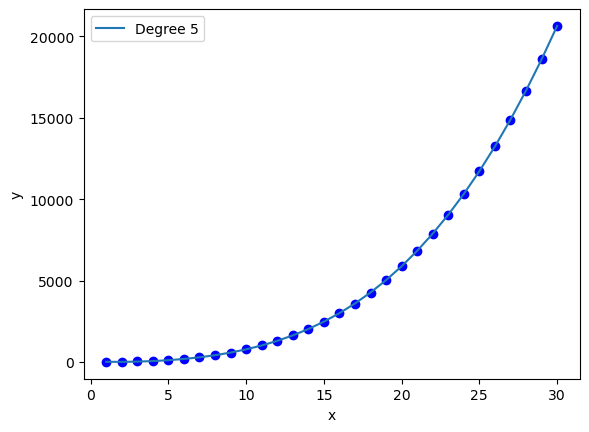

In [12]:
# Fit polynomial regression models of different degrees
degrees = [1, 2, 3, 4, 5]
for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_poly_pred)
    print(f"Degree {degree}: MSE = {mse}")

    # Plotting the results
    plt.scatter(x, y, color='blue')
    plt.plot(x, y_poly_pred, label=f'Degree {degree}')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()


In [15]:
# Sample dataset
data = {
    'x': np.arange(1, 21),
    'linear_y': 2 * np.arange(1, 21),
    'quadratic_y': np.arange(1, 21) ** 2,
    'cubic_y': np.arange(1, 21) ** 3
}
df = pd.DataFrame(data)

In [16]:
df

,x,linear_y,quadratic_y,cubic_y
0,1,2,1,1
1,2,4,4,8
2,3,6,9,27
3,4,8,16,64
4,5,10,25,125
5,6,12,36,216
6,7,14,49,343
7,8,16,64,512
8,9,18,81,729
9,10,20,100,1000


In [17]:
# Function to perform polynomial regression and plot results
def polynomial_regression(x, y, degree):
    poly_features = PolynomialFeatures(degree=degree)
    x_poly = poly_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    mse = mean_squared_error(y, y_poly_pred)
    return y_poly_pred, mse


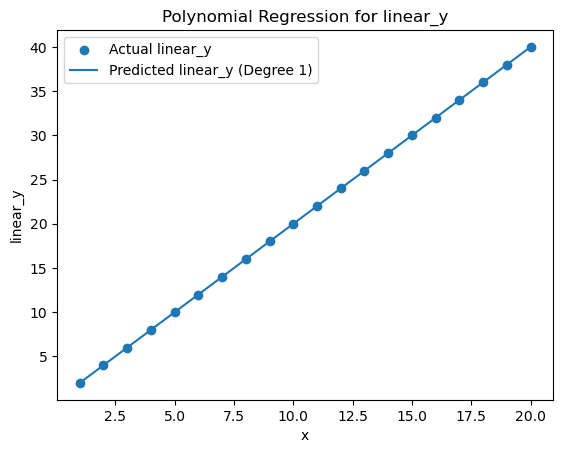

linear_y (Degree 1): MSE = 3.83583615163717e-30


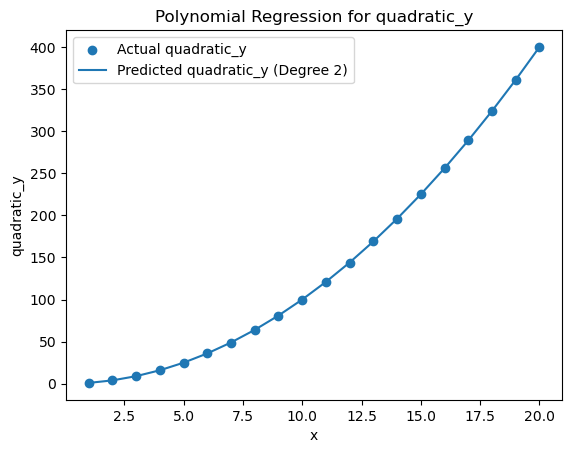

quadratic_y (Degree 2): MSE = 5.773672965312585e-28


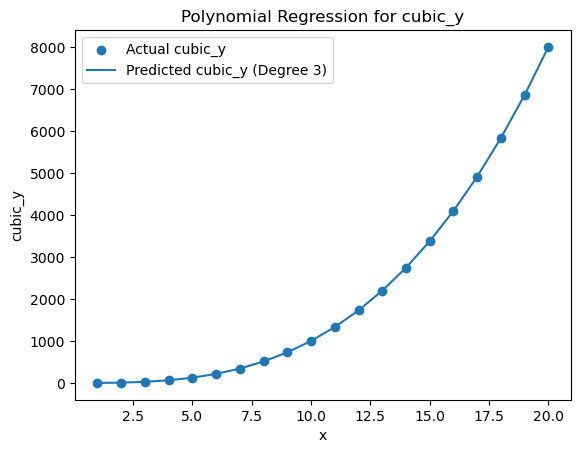

cubic_y (Degree 3): MSE = 8.017460902215626e-25


In [19]:
# Plotting the results for each curve
curves = ['linear_y', 'quadratic_y', 'cubic_y']
degrees = [1, 2, 3]

for curve, degree in zip(curves, degrees):
    x = df[['x']].values
    y = df[[curve]].values
    y_poly_pred, mse = polynomial_regression(x, y, degree)
    
    plt.scatter(x, y, label=f'Actual {curve}')
    plt.plot(x, y_poly_pred, label=f'Predicted {curve} (Degree {degree})')
    plt.xlabel('x')
    plt.ylabel(curve)
    plt.title(f'Polynomial Regression for {curve}')
    plt.legend()
    plt.show()
    
    print(f'{curve} (Degree {degree}): MSE = {mse}')


In [20]:
df = pd.read_csv('dataset3.csv')
df.head()

,x,y
0,1,25
1,2,66
2,3,168
3,4,352
4,5,650


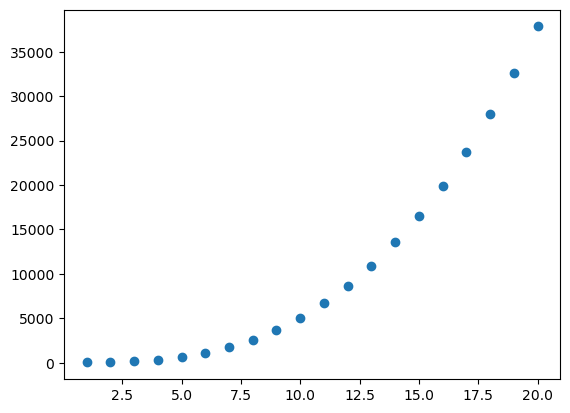

In [21]:
plt.scatter(df['x'], df['y'])

In [22]:
# Extract features and target variable
x = df[['x']].values
y = df['y'].values

In [29]:
# Perform polynomial regression
degree = 1
poly_features = PolynomialFeatures(degree=degree)
x_poly = poly_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)


In [30]:
# Calculate mean squared error
mse = mean_squared_error(y, y_poly_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 18933120.527481206


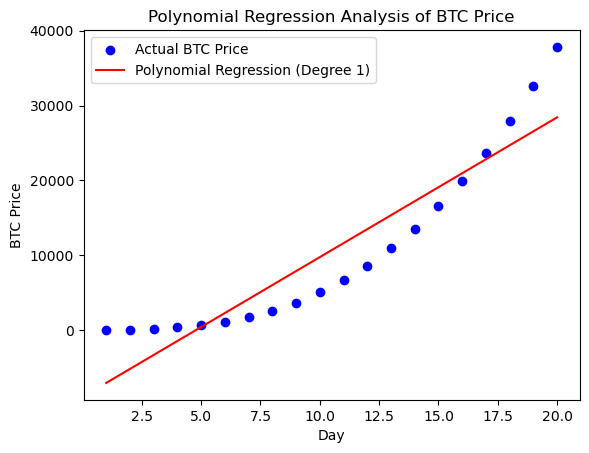

In [31]:
# Plot the results
plt.scatter(x, y, color='blue', label='Actual BTC Price')
plt.plot(x, y_poly_pred, color='red', label=f'Polynomial Regression (Degree {degree})')
plt.xlabel('Day')
plt.ylabel('BTC Price')
plt.title('Polynomial Regression Analysis of BTC Price')
plt.legend()
plt.show()